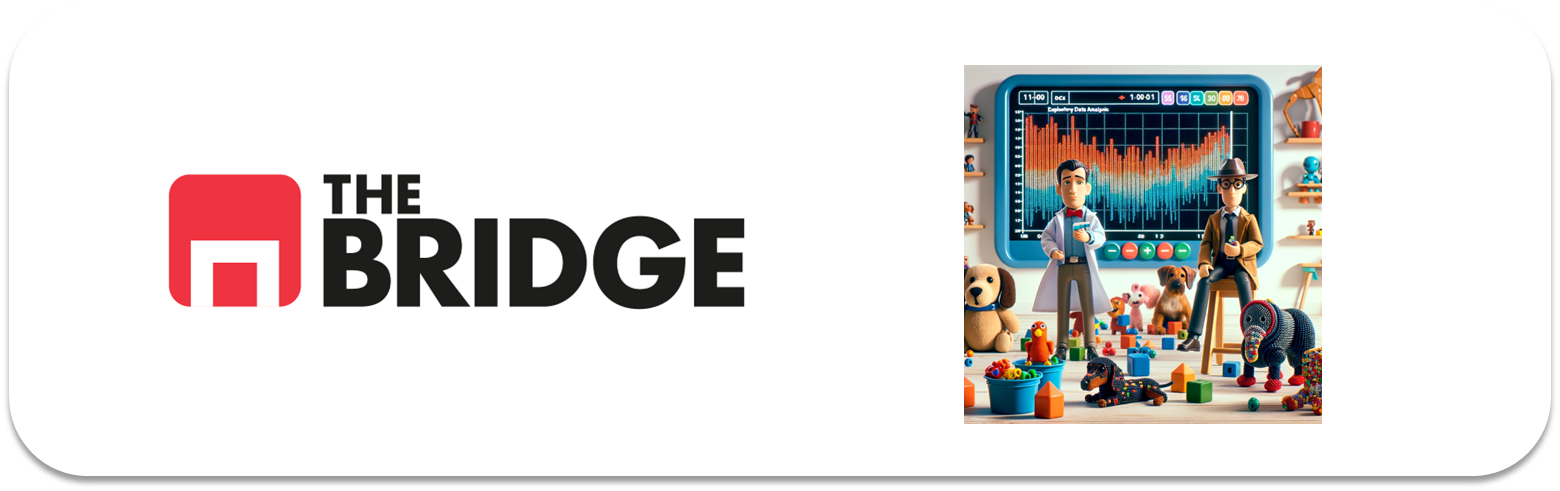

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [13]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [17]:
df = df_titanic.drop(columns = ['deck', 'survived', 'pclass', 'embarked'], errors = 'ignore')
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [15]:
df['family_members'] = df['parch'] + df['sibsp']

In [61]:
df.drop(columns = ['parch', 'sibsp'])

,sex,age,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [62]:
moda = df['embark_town'].mode()[0]

df['embark_town'] = df['embark_town'].fillna(moda)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [63]:
mean_age_by_who = df.groupby('who')['age'].mean()

def impute_age(row):
    if pd.isnull(row['age']):
        return mean_age_by_who[row['who']]
    else:
        return row['age']

df['age'] = df.apply(impute_age, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

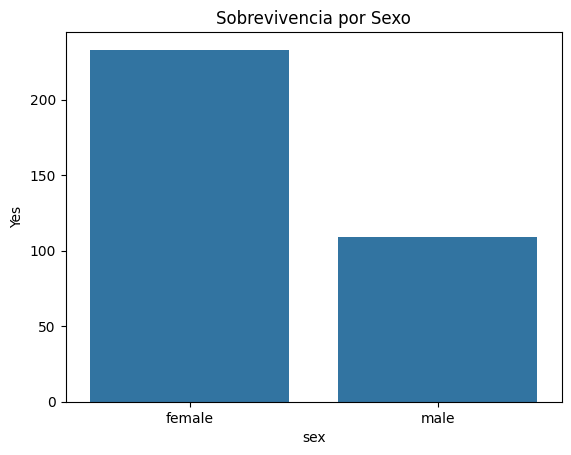

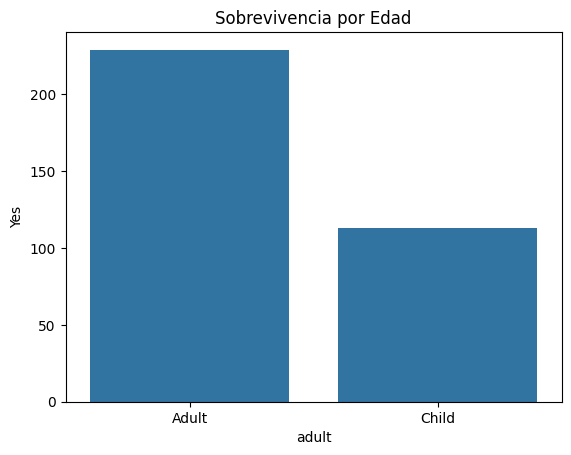

Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58


In [64]:
df_titanic['alive'] = df_titanic['survived'].map({0: 'No', 1: 'Yes'})

sex_survival = df_titanic.groupby(['sex', 'alive']).size().unstack(fill_value=0)

df_titanic['adult'] = df_titanic['age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')
age_survival = df_titanic.groupby(['adult', 'alive']).size().unstack(fill_value=0)

sns.barplot(x=sex_survival.index, y=sex_survival['Yes'])
plt.title('Sobrevivencia por Sexo')
plt.show()

sns.barplot(x=age_survival.index, y=age_survival['Yes'])
plt.title('Sobrevivencia por Edad')
plt.show()

chi2, p, dof, ex = chi2_contingency(sex_survival)
print(f'Chi2: {chi2}, p-value: {p}')


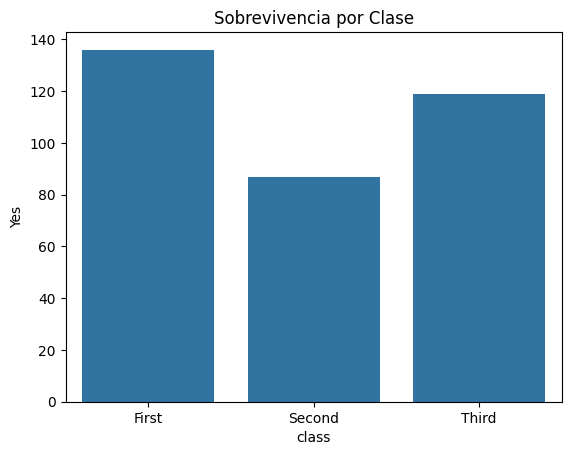

Chi2: 102.88898875696056, p-value: 4.549251711298793e-23


In [65]:
class_survival = df_titanic.groupby(['class', 'alive']).size().unstack(fill_value=0)

sns.barplot(x=class_survival.index, y=class_survival['Yes'])
plt.title('Sobrevivencia por Clase')
plt.show()

chi2_class, p_class, dof_class, ex_class = chi2_contingency(class_survival)
print(f'Chi2: {chi2_class}, p-value: {p_class}')


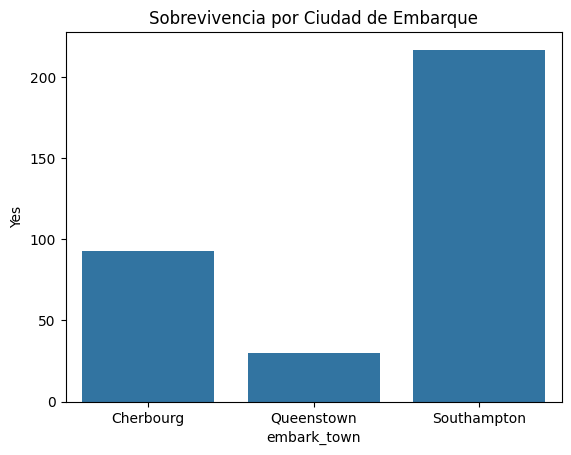

Chi2: 26.48914983923762, p-value: 1.769922284120912e-06


In [66]:
town_survival = df_titanic.groupby(['embark_town', 'alive']).size().unstack(fill_value=0)

sns.barplot(x=town_survival.index, y=town_survival['Yes'])
plt.title('Sobrevivencia por Ciudad de Embarque')
plt.show()

chi2_town, p_town, dof_town, ex_town = chi2_contingency(town_survival)
print(f'Chi2: {chi2_town}, p-value: {p_town}')


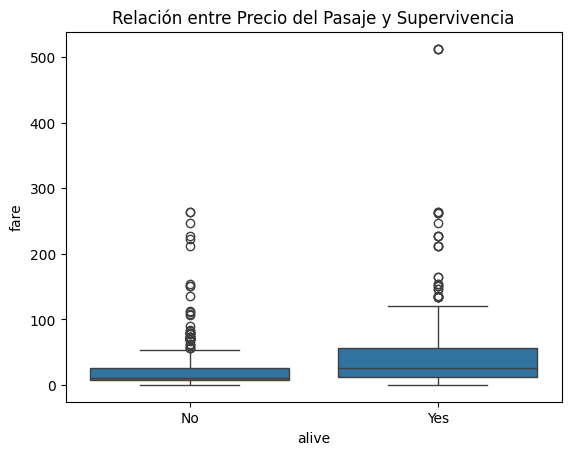

In [68]:
sns.boxplot(x='alive', y='fare', data=df_titanic)
plt.title('Relación entre Precio del Pasaje y Supervivencia')
plt.show()


In [69]:
no_paid = df_titanic[df_titanic['fare'] == 0]
most_paid = df_titanic.loc[df_titanic['fare'].idxmax()]
print(f'Pasajero que más pagó: {most_paid}')


Pasajero que más pagó: survived               1
pclass                 1
sex               female
age                 35.0
sibsp                  0
parch                  0
fare            512.3292
embarked               C
class              First
who                woman
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                Yes
alone               True
adult              Adult
Name: 258, dtype: object


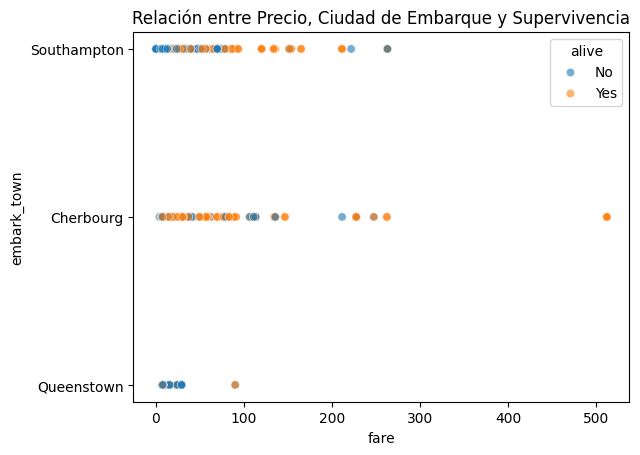

In [70]:
sns.scatterplot(data=df_titanic, x='fare', y='embark_town', hue='alive', alpha=0.6)
plt.title('Relación entre Precio, Ciudad de Embarque y Supervivencia')
plt.show()


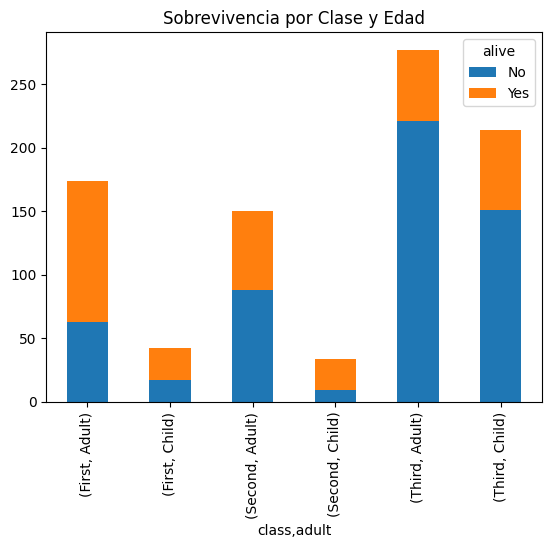

In [31]:
# Agrupar por clase y edad
age_class_survival = df_titanic.groupby(['class', 'adult', 'alive']).size().unstack(fill_value=0)

# Visualización
age_class_survival.plot(kind='bar', stacked=True)
plt.title('Sobrevivencia por Clase y Edad')
plt.show()


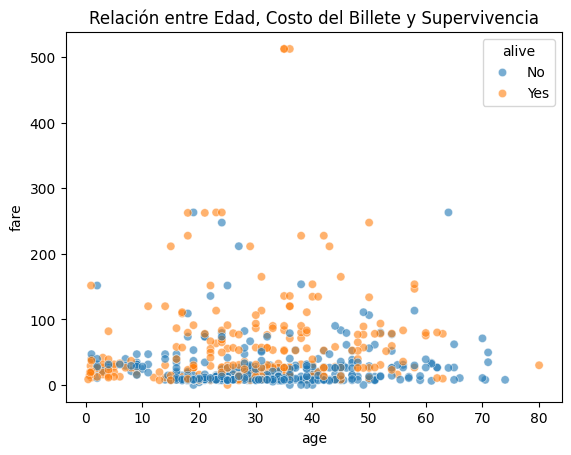

In [71]:
sns.scatterplot(data=df_titanic, x='age', y='fare', hue='alive', alpha=0.6)
plt.title('Relación entre Edad, Costo del Billete y Supervivencia')
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [73]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [74]:
viajes_por_compania = df_air_jun['aircompany'].value_counts()
viajes_por_compania

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

In [75]:
viajes_por_ingresos = df_air_jun['ingresos'].value_counts()
viajes_por_ingresos

ingresos
330320.81    1
14232.65     1
468527.19    1
584789.19    1
233342.51    1
            ..
515892.83    1
19403.07     1
27807.76     1
459544.98    1
776778.69    1
Name: count, Length: 600, dtype: int64

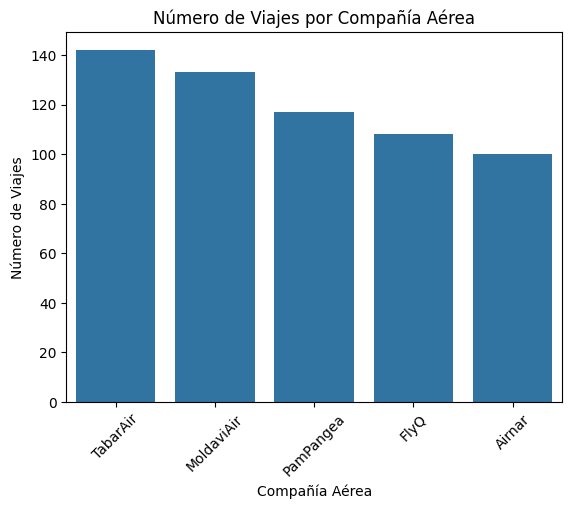

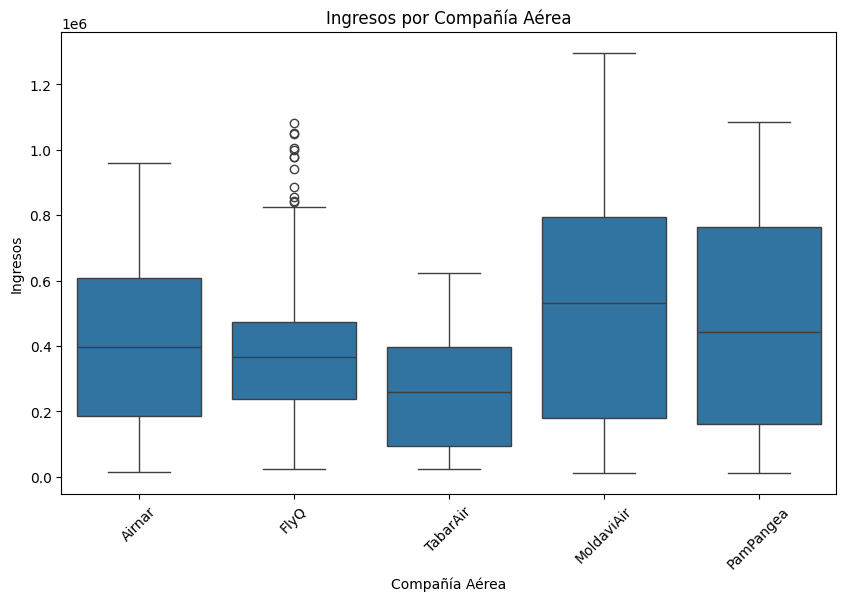

In [76]:

sns.barplot(x=viajes_por_compania.index, y=viajes_por_compania.values)
plt.title('Número de Viajes por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='aircompany', y='ingresos', data=df_air_jun)
plt.title('Ingresos por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

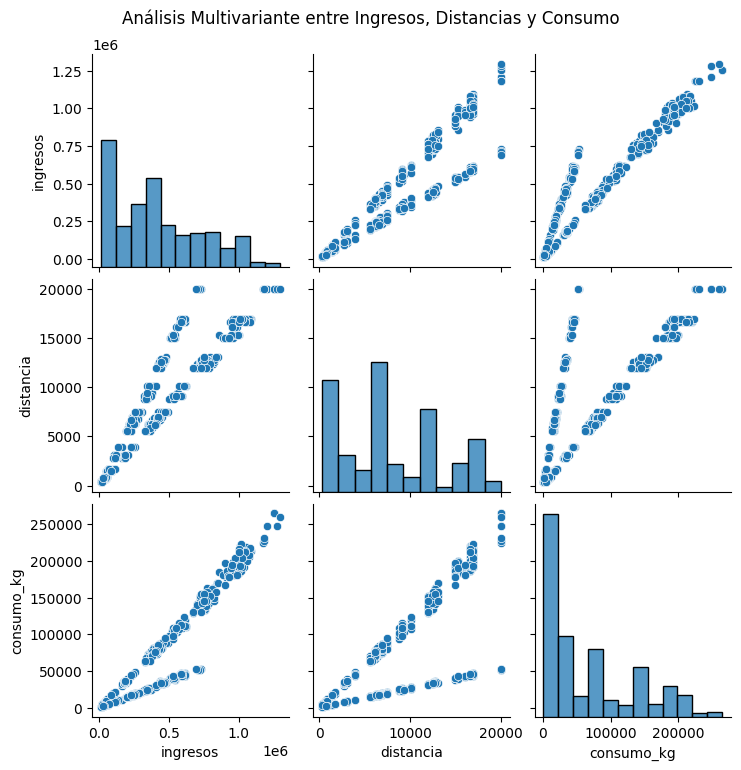

In [77]:
sns.pairplot(df_air_jun[['ingresos', 'distancia', 'consumo_kg']])
plt.suptitle('Análisis Multivariante entre Ingresos, Distancias y Consumo', y=1.02)
plt.show()


### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [78]:
bins = [0, 500, 1500, 3000, df_air_jun['distancia'].max()]
labels = ['Corto', 'Medio', 'Largo', 'Extra Largo']
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels)
df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Extra Largo
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Extra Largo
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Extra Largo
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Extra Largo


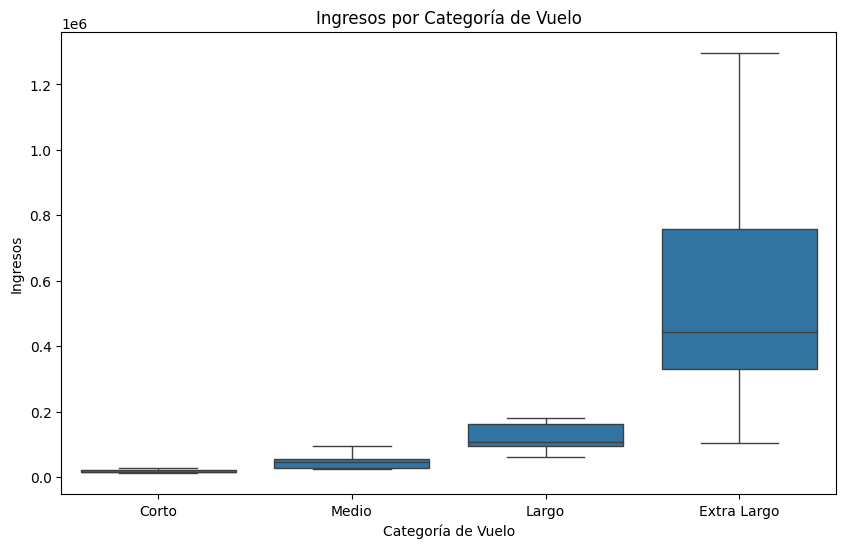

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cat_vuelo', y='ingresos', data=df_air_jun)
plt.title('Ingresos por Categoría de Vuelo')
plt.xlabel('Categoría de Vuelo')
plt.ylabel('Ingresos')
plt.show()


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

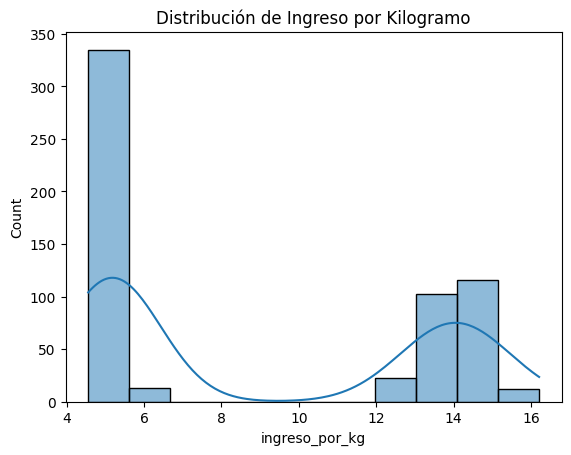

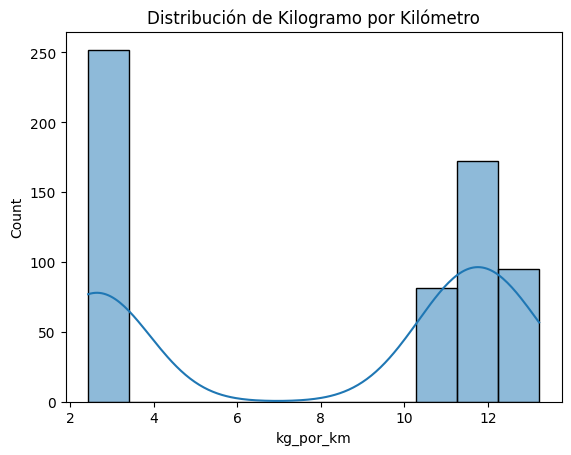

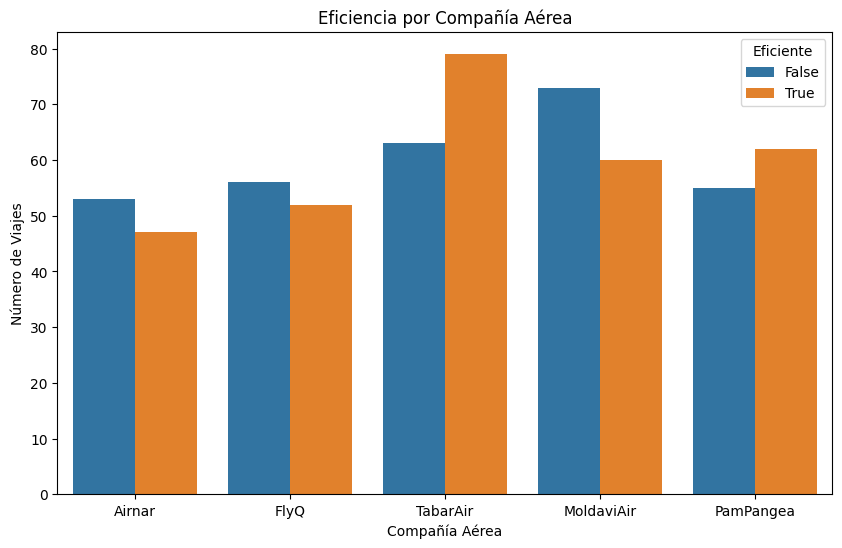

In [80]:
df_air_jun['ingreso_por_kg'] = df_air_jun['ingresos'] / df_air_jun['consumo_kg']
df_air_jun['kg_por_km'] = df_air_jun['consumo_kg'] / df_air_jun['distancia']

sns.histplot(df_air_jun['ingreso_por_kg'], kde=True)
plt.title('Distribución de Ingreso por Kilogramo')
plt.show()

sns.histplot(df_air_jun['kg_por_km'], kde=True)
plt.title('Distribución de Kilogramo por Kilómetro')
plt.show()

umbral_eficiencia = df_air_jun['ingreso_por_kg'].median()
df_air_jun['eficiencia'] = df_air_jun['ingreso_por_kg'] >= umbral_eficiencia

plt.figure(figsize=(10, 6))
sns.countplot(x='aircompany', hue='eficiencia', data=df_air_jun)
plt.title('Eficiencia por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Número de Viajes')
plt.legend(title='Eficiente')
plt.show()
